In [1]:
import math as mt
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def translacao(matriz, x, y, z):
    target = np.array([[1,0,0,x],
                       [0,1,0,y],
                       [0,0,1,z],
                       [0,0,0,1]])
    matriz = target.dot(matriz)
    return matriz
        
def escala(matriz, x, y, z):
    target = np.array([[x,0,0,0],
                       [0,y,0,0],
                       [0,0,z,0],
                       [0,0,0,1]])
    matriz = target.dot(matriz)
    return matriz    

def rotacaox(matriz, a):
    r = mt.radians(a)
    target = np.array([[1,0,0,0],
                       [0,mt.cos(r),mt.sin(r)*-1, 0],
                       [0,mt.sin(r),mt.cos(r), 0],
                       [0,0,0,1]])
    matriz = target.dot(matriz)
    return matriz

def rotacaoy(matriz, a):
    r = mt.radians(a)
    target = np.array([[mt.cos(r),0,mt.sin(r),0],
                       [0,1,0,0],
                       [mt.sin(r)*-1,0,mt.cos(r),0],
                       [0,0,0,1]])
    matriz = target.dot(matriz)
    return matriz

def rotacaoz(matriz, a):
    r = mt.radians(a)
    target = np.array([[mt.cos(r),mt.sin(r)*-1,0,0],
                       [mt.sin(r),mt.cos(r),0,0],
                       [0,0,1,0],
                       [0,0,0,1]])
    matriz = target.dot(matriz)
    return matriz

def aplicar(matriz, p):
    point = matriz.dot(p)
    res = [point[0], point[1], point[2], 1]
    return res;

def aplicarw(matriz, p):
    point = matriz.dot(p)
    res = [point[0], point[1], point[2], point[3]]
    return res;

In [17]:
class Solido:
    def __init__(self, modelo):
        if(modelo == 'd4'):
            self.d4()

        else:
            self.nome = ''
            self.pontos = np.array([])
            self.arestas = np.array([])
            self.matriz = np.array([[1,0,0,0],
                                    [0,1,0,0],
                                    [0,0,1,0],
                                    [0,0,0,1]])
        
    def d4(self):
        self.nome = 'd4'
        self.pontos = np.array([[0, 0.5, 0, 1], [-0.5, -0.5, 0.5, 1], [0.5, -0.5, 0.5, 1], [0.5, -0.5, -0.5, 1], [-0.5, -0.5, -0.5, 1]])
        self.matriz = np.array([[1,0,0,0],
                                [0,1,0,0],
                                [0,0,1,0],
                                [0,0,0,1]])
        
        

In [4]:
# Multiplicar Operações por -1

class Camera:
    def __init__(self):
        self.posicao = np.array([0, 0, 2])
        self.matriz = np.array([[1,0,0,0],
                                [0,1,0,0],
                                [0,0,1,-2],
                                [0,0,0,1]])

In [5]:
class Perspectiva:
    def __init__(self):
        self.fovy = 67
        self.aspect = 1
        self.near = 0.1 # deve ser positivo > 0
        self.far = 100 # deve ser positivo > 0
        
    def calcular(self):
        matriz = np.array([[(1/(mt.tan(self.fovy/2)*self.aspect)), 0, 0, 0],
                           [0, (1/(mt.tan(self.fovy/2))), 0, 0],
                           [0, 0, ((self.far + self.near)/(self.near - self.far)), ((2 * self.far * self.near)/(self.near - self.far))],
                           [0, 0, -1, 0]])
        return matriz
        
class Paralela:
    def __init__(self):
        self.left = -50
        self.right = 50
        self.bottom = -50
        self.top = 50
        self.near = 0
        self.far = 100
        
    def calcular(self):
        matriz = np.array([[(2/(self.right-self.left)), 0, 0, -((self.right + self.left)/(self.right - self.left))],
                           [0, (2/(self.top - self.bottom)), 0, -((self.top + self.bottom)/(self.top - self.bottom))],
                           [0, 0, -(2/self.far - self.near), -((self.far + self.near)/(self.far - self.near))],
                           [0, 0, 0, 1]])
        return matriz
        
class Projecao:
    def __init__(self):
        self.modo = 1 # 0 = Paralela, 1 = Perspectiva
        self.perspectiva = Perspectiva()
        self.paralela = Paralela()
        self.matriz = np.array([[1.51,0,0,0],
                                [0,1.51,0,0],
                                [0,0,-1,-0.2],
                                [0,0,-1,0]])
    
    def calcular(self):
        if(self.modo == 0):
            self.matriz = self.paralela.calcular()
        else:
            self.matriz = self.perspectiva.calcular()
            

In [6]:
class Window:
    def __init__(self):
        self.xmin = -1
        self.xmax = 1
        self.ymin = -1
        self.ymax = 1

class Viewport:
    def __init__(self):
        self.xmin = 0
        self.xmax = 500
        self.ymin = 0
        self.ymax = 500
        

In [44]:
class Cena:
    def __init__(self):
        self.solido = Solido('d4')
        self.camera = Camera()
        self.projecao = Projecao()
        self.window = Window()
        self.view = Viewport()
        
    def calcular(self):
        real = []
        # print('i got here')
        for ponto in self.solido.pontos:
            # print()
            # print('new')
            # print(ponto)
            ponto = aplicar(self.solido.matriz, ponto)
            # print(ponto)
            ponto = aplicar(self.camera.matriz, ponto)
            # print(ponto)
            ponto = aplicarw(self.projecao.matriz, ponto)
            # print(ponto)
            
            x = ponto[0]/ponto[3]
            y = ponto[1]/ponto[3]
            
            print([x, y])
            
            real.append([x, y])
        
        for i in range(0, len(real)):
            x = (((real[i][0] - self.window.xmin) * (self.view.xmax - self.view.xmin))/(self.window.xmax - self.window.xmin)) + self.view.xmin 
            y = (((real[i][1] - self.window.ymin) * (self.view.ymax - self.view.ymin))/(self.window.ymax - self.window.ymin)) + self.view.ymin
            
            real[i] = [x,y]
        return real
    
    def mostrar(self):
        p = self.calcular()
        
        fig = plt.figure(figsize=((self.view.xmax - self.view.xmin)/100, (self.view.ymax - self.view.ymin)/100))
        ax = fig.add_subplot(111)
        if self.solido.nome == 'd4':
            ax.plot([p[0][0], p[1][0]], [p[0][1], p[1][1]])
            ax.plot([p[0][0], p[2][0]], [p[0][1], p[2][1]])
            ax.plot([p[0][0], p[3][0]], [p[0][1], p[3][1]])
            ax.plot([p[0][0], p[4][0]], [p[0][1], p[4][1]])


            ax.plot([p[1][0], p[2][0]], [p[1][1], p[2][1]])
            ax.plot([p[2][0], p[3][0]], [p[2][1], p[3][1]])
            ax.plot([p[3][0], p[4][0]], [p[3][1], p[4][1]])
            ax.plot([p[4][0], p[1][0]], [p[4][1], p[1][1]])
        
            plt.show()
    
    def menu(self):
        while True:
            print()
            print("1. Manipular o Objeto")
            print("2. Manipular a Câmera")
            print("3. Modificar a Projeção")
            print("4. Modificar o Mapeamento")
            print("5. Visualizar o Objeto")
            print("0. Sair")

            opt = int(input("Selecione uma opção: "))
            loop = True

            while loop:
                if(opt == 1):
                    print()
                    print("1. Translação")
                    print("2. Escala")
                    print("3. Rotação em X")
                    print("4. Rotação em Y")
                    print("5. Rotação em Z")
                    print("0. Retornar")
                    
                    subopt = int(input("Selecione uma opção: "))
                    
                    if(subopt == 1):
                        a = float(input("Digite o valor de x: "))
                        b = float(input("Digite o valor de y: "))
                        c = float(input("Digite o valor de z: "))
                        self.solido.matriz = translacao(self.solido.matriz, a, b, c)
                        
                    elif(subopt == 2):
                        a = float(input("Digite o valor de x: "))
                        b = float(input("Digite o valor de y: "))
                        c = float(input("Digite o valor de z: "))
                        self.solido.matriz = escala(self.solido.matriz, a, b, c)
                        
                    elif(subopt == 3):
                        a = float(input("Digite o valor do ângulo: "))
                        self.solido.matriz = rotacaox(self.solido.matriz, a)
                        
                    elif(subopt == 4):
                        a = float(input("Digite o valor do ângulo: "))
                        self.solido.matriz = rotacaoy(self.solido.matriz, a)
                        
                    elif(subopt == 5):
                        a = float(input("Digite o valor do ângulo: "))
                        self.solido.matriz = rotacaoz(self.solido.matriz, a)
                        
                    else:
                        loop = False
                        
                        
                elif(opt == 2):
                    print()
                    print("1. Translação")
                    print("2. Rotação em X")
                    print("3. Rotação em Y")
                    print("4. Rotação em Z")
                    print("0. Retornar")
                    
                    subopt = int(input("Selecione uma opção: "))
                    
                    if(subopt == 1):
                        a = float(input("Digite o valor de x: "))
                        b = float(input("Digite o valor de y: "))
                        c = float(input("Digite o valor de z: "))
                        self.camera.matriz = translacao(self.camera.matriz, -a, -b, -c)
                        
                    elif(subopt == 2):
                        a = float(input("Digite o valor do ângulo: "))
                        self.camera.matriz = rotacaox(self.camera.matriz, -a)
                        
                    elif(subopt == 3):
                        a = float(input("Digite o valor do ângulo: "))
                        self.camera.matriz = rotacaoy(self.camera.matriz, -a)
                        
                    elif(subopt == 4):
                        a = float(input("Digite o valor do ângulo: "))
                        self.camera.matriz = rotacaoz(self.camera.matriz, -a)
                        
                    else:
                        loop = False
                    
                elif(opt == 3):
                    print()
                    print("1. Projeção Perspectiva")
                    print("2. Projeção Paralela")
                    print("0. Retornar")
                    
                    subopt = int(input("Selecione uma opção: "))
                    
                    if(subopt == 1):
                        self.projecao.modo = 1
                        
                        print()
                        print("fovy: " + str(self.projecao.perspectiva.fovy))
                        print("aspect: " + str(self.projecao.perspectiva.aspect))
                        print("near: " + str(self.projecao.perspectiva.near))
                        print("far: " + str(self.projecao.perspectiva.far))
                        print()
                       
                        change = int(input("Deseja mudar os dados? (0:Não / 1:Sim)"))
                        
                        if(change == 1):
                            self.projecao.perspectiva.fovy = float(input("Digite o valor do fovy: "))
                            self.projecao.perspectiva.aspect = float(input("Digite o valor do aspect: "))
                            self.projecao.perspectiva.near = float(input("Digite o valor do near: "))
                            self.projecao.perspectiva.far = float(input("Digite o valor do far: "))
                            
                        
                        self.projecao.calcular()
                        loop = False
                        
                    elif(subopt == 2):
                        self.projecao.modo = 0
                        print()
                        print("left: " + str(self.projecao.paralela.left))
                        print("right: " + str(self.projecao.paralela.right))
                        print("bottom: " + str(self.projecao.paralela.bottom))
                        print("top: " + str(self.projecao.paralela.top))
                        print("near: " + str(self.projecao.paralela.near))
                        print("far: " + str(self.projecao.paralela.far))
                        print()
                       
                        change = int(input("Deseja mudar os dados? (0:Não / 1:Sim)"))
                        
                        if(change == 1):
                            self.projecao.paralela.left = float(input("Digite o valor do left: "))
                            self.projecao.paralela.right = float(input("Digite o valor do right: "))
                            self.projecao.paralela.bottom = float(input("Digite o valor do bottom: "))
                            self.projecao.paralela.top = float(input("Digite o valor do top: "))
                            self.projecao.paralela.near = float(input("Digite o valor do near: "))
                            self.projecao.paralela.far = float(input("Digite o valor do far: "))
                        
                        self.projecao.calcular()
                        loop = False
                        
                    else:
                        loop = False
                    
                elif(opt == 4):
                    print()
                    print("1. Window")
                    print("2. Viewport")
                    print("0. Retornar")
                    
                    subopt = int(input("Selecione uma opção: "))
                    
                    if(subopt == 1):
                        print()
                        print("xmin: " + str(self.window.xmin))
                        print("xmax: " + str(self.window.xmin))
                        print("ymin: " + str(self.window.xmin))
                        print("ymax: " + str(self.window.xmin))
                        print()
                        
                        change = int(input("Deseja mudar os dados? (0:Não / 1:Sim)"))
                        
                        if(change == 1):
                            self.window.xmin = int(input("Digite o valor do xmin: "))
                            self.window.xmax = int(input("Digite o valor do xmax: "))
                            self.window.ymin = int(input("Digite o valor do ymin: "))
                            self.window.ymax = int(input("Digite o valor do ymax: "))
                            
                        loop = False
                        
                    elif(subopt == 2):
                        print()
                        print("xmin: " + str(self.viewport.xmin))
                        print("xmax: " + str(self.viewport.xmin))
                        print("ymin: " + str(self.viewport.xmin))
                        print("ymax: " + str(self.viewport.xmin))
                        print()
                        
                        change = int(input("Deseja mudar os dados? (0:Não / 1:Sim)"))
                        
                        if(change == 1):
                            self.viewport.xmin = int(input("Digite o valor do xmin: "))
                            self.viewport.xmax = int(input("Digite o valor do xmax: "))
                            self.viewport.ymin = int(input("Digite o valor do ymin: "))
                            self.viewport.ymax = int(input("Digite o valor do ymax: "))
                        
                        loop = False
                        
                    else:
                        loop = False
                    
                elif(opt == 5):
                    self.mostrar()
                    loop = False
                else:
                    return 1
        


1. Manipular o Objeto
2. Manipular a Câmera
3. Modificar a Projeção
4. Modificar o Mapeamento
5. Visualizar o Objeto
0. Sair
Selecione uma opção: 5
[0.0, 0.3775]
[-0.5033333333333333, -0.5033333333333333]
[0.5033333333333333, -0.5033333333333333]
[0.302, -0.302]
[-0.302, -0.302]


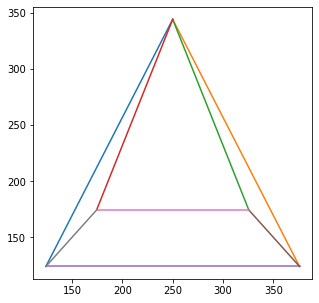


1. Manipular o Objeto
2. Manipular a Câmera
3. Modificar a Projeção
4. Modificar o Mapeamento
5. Visualizar o Objeto
0. Sair
Selecione uma opção: 1

1. Translação
2. Escala
3. Rotação em X
4. Rotação em Y
5. Rotação em Z
0. Retornar
Selecione uma opção: 5
Digite o valor do ângulo: 70

1. Translação
2. Escala
3. Rotação em X
4. Rotação em Y
5. Rotação em Z
0. Retornar
Selecione uma opção: 0

1. Manipular o Objeto
2. Manipular a Câmera
3. Modificar a Projeção
4. Modificar o Mapeamento
5. Visualizar o Objeto
0. Sair
Selecione uma opção: 5
[-0.3547339643466804, 0.12911260410543998]
[0.30082848032165393, -0.6451287579361605]
[0.6451287579361605, 0.30082848032165393]
[0.3870772547616963, 0.18049708819299234]
[0.18049708819299234, -0.3870772547616963]


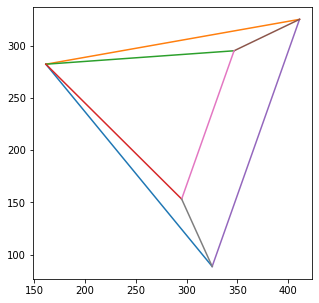


1. Manipular o Objeto
2. Manipular a Câmera
3. Modificar a Projeção
4. Modificar o Mapeamento
5. Visualizar o Objeto
0. Sair
Selecione uma opção: 1

1. Translação
2. Escala
3. Rotação em X
4. Rotação em Y
5. Rotação em Z
0. Retornar
Selecione uma opção: 4
Digite o valor do ângulo: 70

1. Translação
2. Escala
3. Rotação em X
4. Rotação em Y
5. Rotação em Z
0. Retornar
Selecione uma opção: 0

1. Manipular o Objeto
2. Manipular a Câmera
3. Modificar a Projeção
4. Modificar o Mapeamento
5. Visualizar o Objeto
0. Sair
Selecione uma opção: 5
[-0.15569717842394928, 0.165689476515983]
[0.4094228528627655, -0.45866491589119834]
[0.42795300880116344, 0.1856050931817255]
[-0.13648309355109328, 0.16271447346506657]
[-0.22641664546797616, -0.3946829080654893]


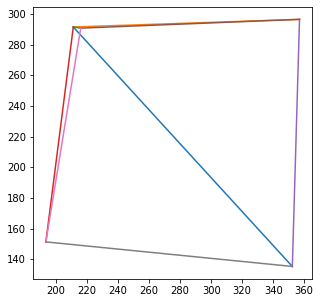


1. Manipular o Objeto
2. Manipular a Câmera
3. Modificar a Projeção
4. Modificar o Mapeamento
5. Visualizar o Objeto
0. Sair
Selecione uma opção: 0


1

In [49]:
c = Cena()
c.menu()